In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('SampleSuperstore.csv')

# Exploring the Data

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Cleaning the data

### Let's check for any missing values

In [8]:
df.isnull().sum()


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Check for duplicate rows

In [9]:
rows = df.duplicated()

In [10]:
data = df[rows]

In [11]:
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [12]:
#Delete duplicate rows
df.drop_duplicates(keep = 'first', inplace = True)


In [13]:
df.shape

(9977, 13)

In [14]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

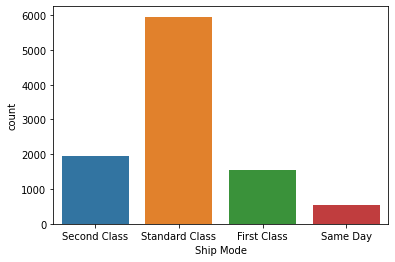

In [15]:
sns.countplot(x='Ship Mode', data=df )

#### Standard class is the most shipped mode

In [16]:
a = df['City'].value_counts().head(20)
a

New York City    914
Los Angeles      746
Philadelphia     536
San Francisco    506
Seattle          424
Houston          375
Chicago          313
Columbus         221
San Diego        170
Springfield      163
Dallas           157
Jacksonville     125
Detroit          114
Newark            95
Richmond          90
Jackson           82
Columbia          81
Aurora            68
Phoenix           63
Long Beach        61
Name: City, dtype: int64

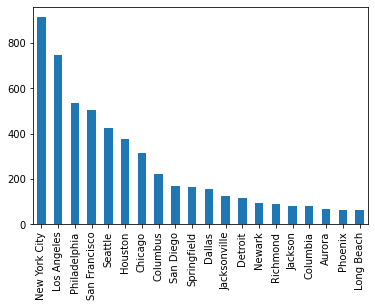

In [17]:
a.plot(kind = 'bar')

#### New York city, Los Angeles, Philadelphia and San Fransisco has the highest sales

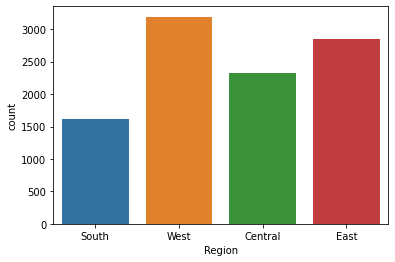

In [18]:
df['Region'].value_counts()
sns.countplot(x = 'Region', data = df )

In [19]:
df.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


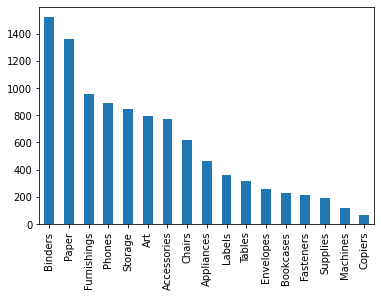

In [20]:
df['Sub-Category'].value_counts().plot(kind = 'bar')


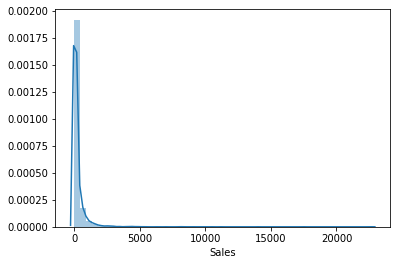

In [21]:
sns.distplot(df['Sales'] )

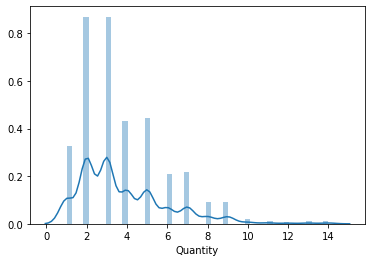

In [22]:
sns.distplot(df['Quantity'] )


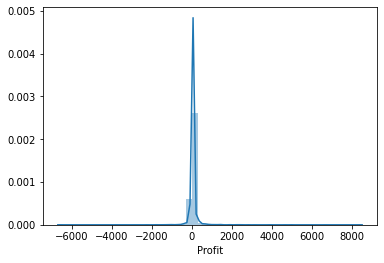

In [23]:
sns.distplot(df['Profit'] )


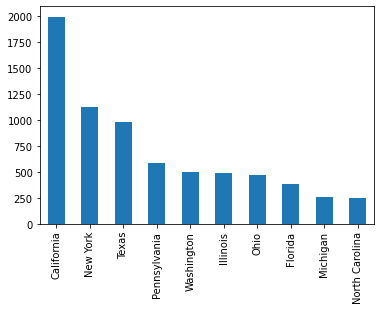

In [24]:
df['State'].value_counts().head(10).plot(kind = 'bar')


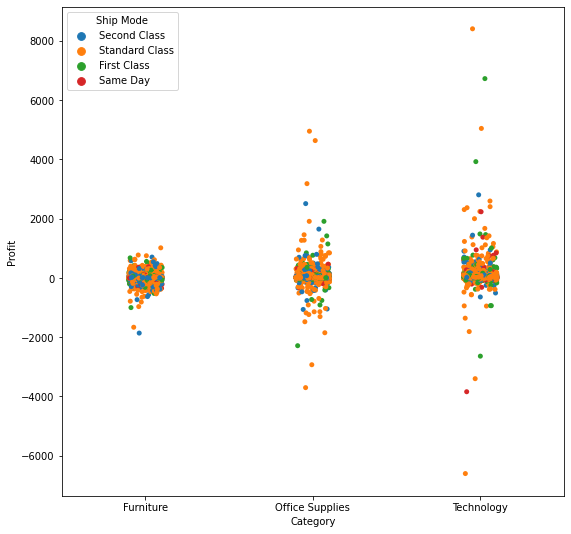

In [25]:
plt.figure(figsize = (9, 9))
sns.stripplot(x='Category',y='Profit',data=df ,hue='Ship Mode')

### Technology has the highest profit

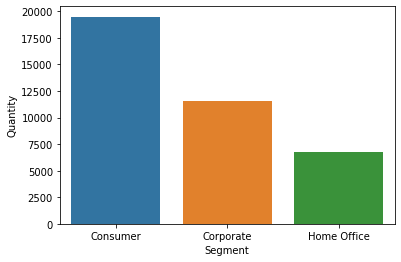

In [26]:
temp = df.groupby(['Segment'],as_index = False).sum()
sns.barplot(x = 'Segment', y = 'Quantity', data = temp)


### As per above visualization, consumer purchases more quantities

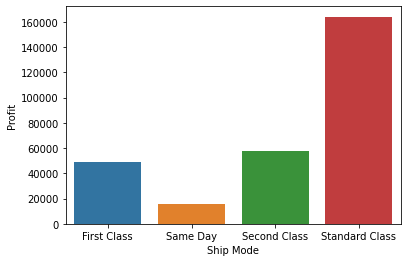

In [27]:
temp = df.groupby(['Ship Mode'], as_index = False)['Profit'].sum()
sns.barplot(temp['Ship Mode'], temp['Profit'])

### So standard Class has more profit

In [28]:
data = df.groupby(['Ship Mode'])['Discount'].sum().reset_index()
data

,Ship Mode,Discount
0,First Class,252.97
1,Same Day,82.75
2,Second Class,269.35
3,Standard Class,954.12


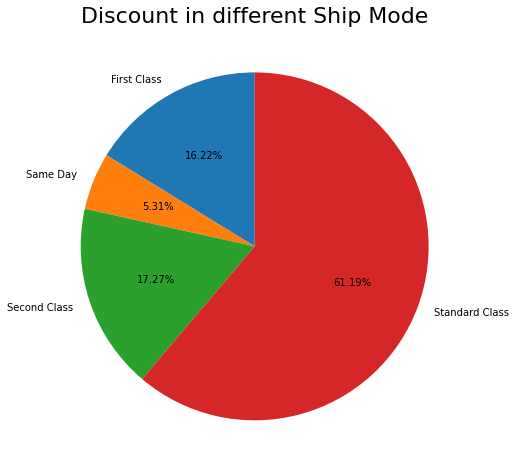

In [29]:
labels = data['Ship Mode'].values
sizes = data['Discount'].values

fig1, axis = plt.subplots(figsize=(8,8))
axis.pie(sizes, labels=labels, autopct='%1.2f%%',
        startangle=90)

plt.title('Discount in different Ship Mode', fontsize=22)
plt.show()

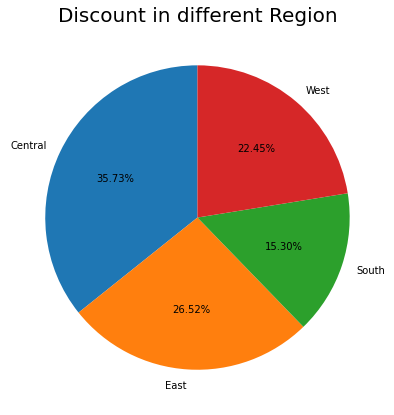

In [30]:
data2 = df.groupby(['Region'])['Discount'].sum().reset_index()
data2
labels = data2['Region'].values
sizes = data2['Discount'].values

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
         startangle=90)
plt.title('Discount in different Region', fontsize=20)
plt.show()

In [31]:
data3 = df.groupby(['Region'], as_index = False, sort = True)['Profit'].mean()
data3

,Region,Profit
0,Central,17.100421
1,East,32.163905
2,South,28.857673
3,West,33.927281


In [33]:
region = data3['Region'].values
profit = data3['Profit'].values

Text(0.5, 1.0, 'Average profit for Different regions')

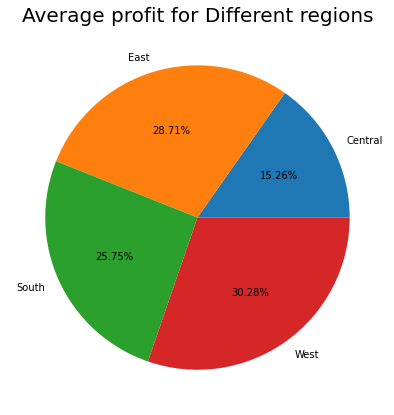

In [34]:
fig1, ax1 = plt.subplots(figsize=(7,7))

ax1.pie(profit, labels = region, autopct='%1.2f%%')
plt.title('Average profit for Different regions', fontsize = 20)

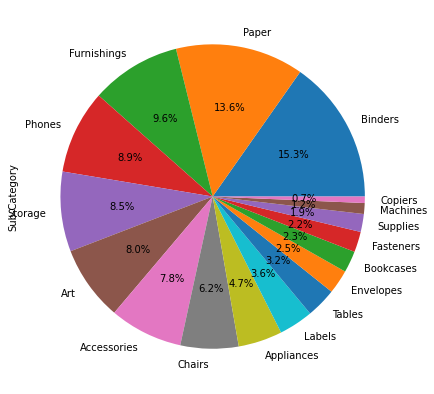

In [35]:
plt.figure(figsize = (7, 7))
df['Sub-Category'].value_counts().plot(kind = 'pie', autopct='%1.1f%%' )
plt.show()

### We can see that Binders, Paper and Furnishing are the materials which are sold more.


In [36]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


#### profit and sales are showing corelation

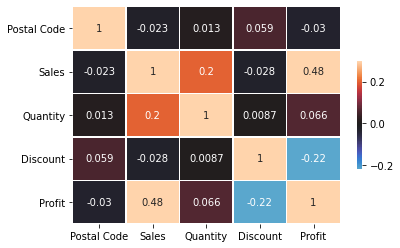

In [37]:
corr = df.corr()
sns.heatmap(corr, vmax=.3, center=0, linewidths=.5, cbar_kws={"shrink": .5} , annot = True)

### Correlation matrix

In [38]:
data4 = df.groupby('Category')['Profit','Quantity'].sum()
print(data4)

                      Profit  Quantity
Category                              
Furniture         18421.8137      8020
Office Supplies  122364.6608     22861
Technology       145454.9481      6939


/home/angaria3/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


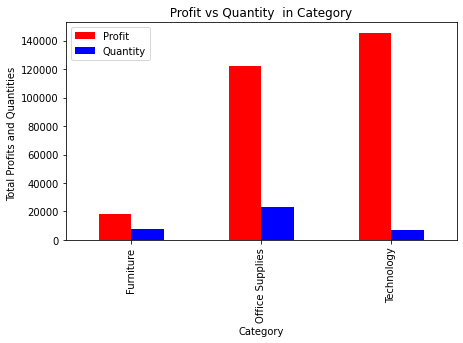

In [39]:
data4.plot( kind ="bar" ,  color = ['red','blue'] , figsize= (7,4))
plt.ylabel("Total Profits and Quantities ")
plt.title(" Profit vs Quantity  in Category ")
plt.legend()
plt.show()

# Conclusion

#### 1) To rise the profits , we first need to sell consumer segment products more.
#### 2) Binders, Paper and Furnishing are the materials which are sold more.
#### 3) Technology Category earns the higher profits.
#### 4) There is positive correlation between sales and profit.
#### 5) New York city, Los Angeles, Philadelphia and San Fransisco has the highest sales. To rise the profit more investment should be made there.
#### 6) Standard Class ship mode has more profit. And same day ship mode has least.